In [15]:
import contextlib
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import os
import pickle
from tqdm import tqdm
import torch
from torch_geometric.data import Data
from urllib.request import urlretrieve

from load_dataset import create_grid_dataset, save_database

# Data Preprocessing
## Loading raw dataset into serialized file of PyTorch geometric dataset (pickle)

The raw data is used on this project is from Bentivoglio Roberto, & Bruijns Ron. (2023). Raw datasets for paper "Rapid Spatio-Temporal Flood Modelling via Hydraulics-Based Graph Neural Networks" [Data set]. Zenodo. https://doi.org/10.5281/zenodo.7764418. 

Raw datasets contain elevation (DEM), water depth (WD) in time and velocities (in x and y direction, VX and VY) in time. The datasets contain 4 subsets, which are divided as training and validation dataset, and 3 training datasets. 

In this project, the model training will be done using the training and validation dataset. The proposed model will be tested out for testing dataset 1.

In [60]:
# make serialized dataset for training and testing dataset
# only use the first testing dataset 
# this part of the code can be left out, as the training dataset and 1st testing dataset is already pickled

# local folder path for dataset
dataset_folder = 'raw_datasets/'

# make two dataset for "training" and "testing"
n_sim = [20, 80]
start_sim = [500, 1]
dataset_name = ['grid_test', 'grid_train']

# create a folder for datasets
datasets_folder = 'datasets' 
if not os.path.exists(datasets_folder):
    os.makedirs(datasets_folder)
    
dataset_dir = datasets_folder 

print(os.getcwd())

# convert into pyTorch Graphic object 
for i in range (2):
    pyg_dataset = create_grid_dataset(dataset_folder, n_sim=n_sim[i])
    save_database(pyg_dataset, name=dataset_name[i], out_path=dataset_dir)

C:\Users\prayl\OneDrive - Delft University of Technology\06 Q6 - DSAI\project\Flood-5\notebooks


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:24<00:00,  3.30it/s]


In [61]:
pkl_train = os.path.join('datasets', 'grid_train.pkl')
pkl_test = os.path.join('datasets', 'grid_test.pkl')

with open(pkl_train, 'rb') as f:
    train_dataset = pickle.load(f)
    
with open(pkl_test, 'rb') as f:
    test_dataset = pickle.load(f)

# Visualize the Dataset

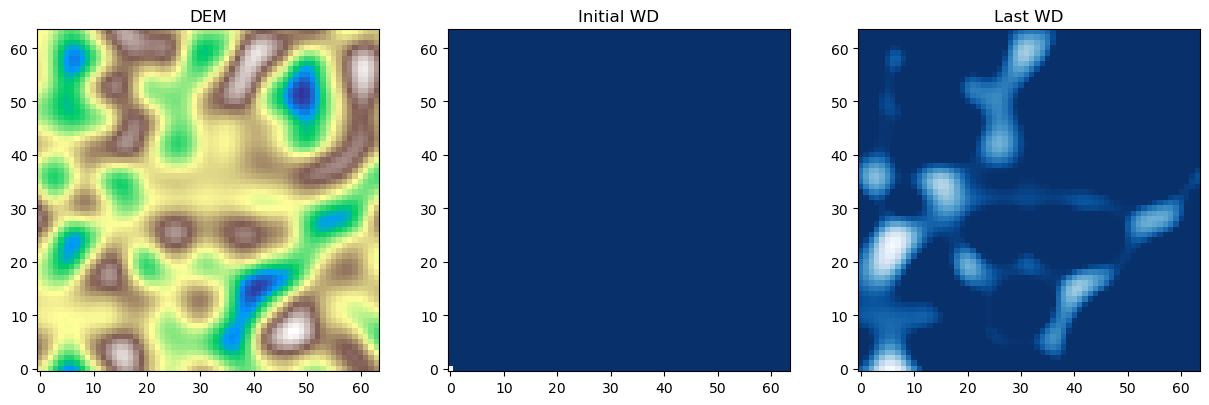

In [62]:
# Training Dataset 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(train_dataset[0]['DEM'].reshape(number_grids,number_grids), cmap='terrain', origin='lower')
axs[0].set_title('DEM')

axs[1].imshow(train_dataset[0]['WD'][:,0].reshape(number_grids,number_grids), cmap='Blues_r', origin='lower')
axs[1].set_title('Initial WD')

axs[2].imshow(train_dataset[0]['WD'][:,-1].reshape(number_grids,number_grids), cmap='Blues_r', origin='lower')
axs[2].set_title('Last WD')
plt.show()

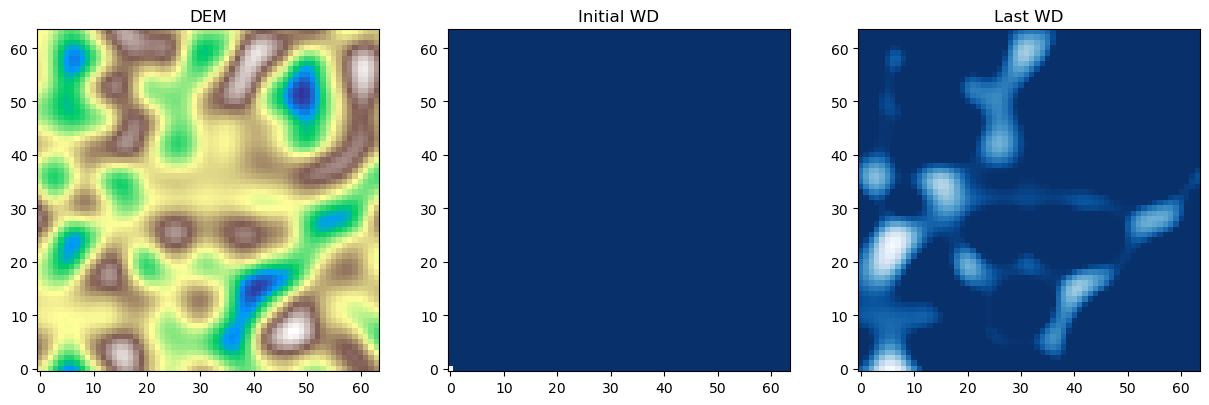

In [63]:
# Testing Dataset

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(test_dataset[0]['DEM'].reshape(number_grids,number_grids), cmap='terrain', origin='lower')
axs[0].set_title('DEM')

axs[1].imshow(test_dataset[0]['WD'][:,0].reshape(number_grids,number_grids), cmap='Blues_r', origin='lower')
axs[1].set_title('Initial WD')

axs[2].imshow(test_dataset[0]['WD'][:,-1].reshape(number_grids,number_grids), cmap='Blues_r', origin='lower')
axs[2].set_title('Last WD')
plt.show()